In [126]:
suppressPackageStartupMessages({
    library(GEOquery)
    library(limma)
    library(edgeR)
    library(dplyr)
    library(biomaRt)
    library(ggplot2)
    library(reshape2)
})

In [104]:
# Download GEO data
gse <- getGEO("GSE72542", GSEMatrix = TRUE)
exprSet <- exprs(gse[[1]])
head(exprSet)

Found 1 file(s)

GSE72542_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpN1ynJz/GSE72542_series_matrix.txt.gz

Using locally cached version of GPL16699 found here:
/tmp/RtmpN1ynJz/GPL16699.soft.gz 



,GSM1864752,GSM1864753,GSM1864754,GSM1864755,GSM1864756,GSM1864757,GSM1864758,GSM1864759,GSM1864760,GSM1864761,⋯,GSM1864803,GSM1864804,GSM1864805,GSM1864806,GSM1864807,GSM1864808,GSM1864809,GSM1864810,GSM1864811,GSM1864812
1,12.917904,11.916739,12.808415,12.131286,13.084703,12.341366,13.310283,12.606554,12.679426,12.934903,⋯,16.978174,17.161240,16.728363,14.684897,17.482427,16.907394,17.378425,16.635041,16.626358,16.526179
2,4.902093,4.619286,4.877764,5.145037,4.687698,4.715420,5.028673,5.212485,5.290064,4.888017,⋯,5.054194,5.019032,5.085691,5.211723,5.049120,5.510169,5.270838,5.430729,5.030112,5.292473
3,4.902093,4.934414,4.652973,4.999146,4.884082,5.049901,4.965282,5.100290,4.865843,5.092127,⋯,5.033053,4.862531,5.180238,4.912088,4.868305,5.106778,4.955356,5.341924,5.301646,5.135792
4,10.917971,10.979406,10.974413,10.533029,10.824892,10.905688,10.691572,10.347118,9.769207,10.763331,⋯,11.256617,11.003278,10.831367,10.757293,11.150371,11.090327,11.516919,10.985136,10.296027,11.187965
5,5.948113,6.160140,5.900604,5.907211,6.930418,6.334619,5.767683,5.612013,5.483985,6.180816,⋯,5.256442,4.862531,5.085691,5.211723,5.274259,4.870772,5.075744,5.396602,5.144655,5.500109
6,5.223737,4.836010,4.988923,5.023674,5.080483,5.097574,5.366506,5.153560,5.167224,4.831113,⋯,5.054194,5.115128,5.000373,5.046939,5.138525,5.067880,5.118592,5.325828,5.203916,5.051297


In [105]:
mapping <- read.delim("mapping.txt", header = TRUE, skip = 19) %>%
dplyr::select(GENE_SYMBOL)
head(mapping)

,GENE_SYMBOL
,<chr>
1,
2,
3,
4,HEBP1
5,KCNE4
6,BPIFA3


In [106]:
mapping$RowIndex <- seq_len(nrow(mapping))

exprSet <- as.data.frame(exprSet)
exprSet$RowIndex <- seq_len(nrow(exprSet))

In [107]:
counts <- left_join(mapping, exprSet, by = "RowIndex") %>% dplyr::select(-RowIndex)
head(counts)

,GENE_SYMBOL,GSM1864752,GSM1864753,GSM1864754,GSM1864755,GSM1864756,GSM1864757,GSM1864758,GSM1864759,GSM1864760,⋯,GSM1864803,GSM1864804,GSM1864805,GSM1864806,GSM1864807,GSM1864808,GSM1864809,GSM1864810,GSM1864811,GSM1864812
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,,12.917904,11.916739,12.808415,12.131286,13.084703,12.341366,13.310283,12.606554,12.679426,⋯,16.978174,17.161240,16.728363,14.684897,17.482427,16.907394,17.378425,16.635041,16.626358,16.526179
2,,4.902093,4.619286,4.877764,5.145037,4.687698,4.715420,5.028673,5.212485,5.290064,⋯,5.054194,5.019032,5.085691,5.211723,5.049120,5.510169,5.270838,5.430729,5.030112,5.292473
3,,4.902093,4.934414,4.652973,4.999146,4.884082,5.049901,4.965282,5.100290,4.865843,⋯,5.033053,4.862531,5.180238,4.912088,4.868305,5.106778,4.955356,5.341924,5.301646,5.135792
4,HEBP1,10.917971,10.979406,10.974413,10.533029,10.824892,10.905688,10.691572,10.347118,9.769207,⋯,11.256617,11.003278,10.831367,10.757293,11.150371,11.090327,11.516919,10.985136,10.296027,11.187965
5,KCNE4,5.948113,6.160140,5.900604,5.907211,6.930418,6.334619,5.767683,5.612013,5.483985,⋯,5.256442,4.862531,5.085691,5.211723,5.274259,4.870772,5.075744,5.396602,5.144655,5.500109
6,BPIFA3,5.223737,4.836010,4.988923,5.023674,5.080483,5.097574,5.366506,5.153560,5.167224,⋯,5.054194,5.115128,5.000373,5.046939,5.138525,5.067880,5.118592,5.325828,5.203916,5.051297


In [117]:
counts <- left_join(mapping, exprSet, by = "RowIndex") %>% 
  dplyr::select(-RowIndex)%>%
  filter(GENE_SYMBOL != "")

rownames(counts) <- make.unique(counts$GENE_SYMBOL)

counts <- counts %>%
 dplyr::select(-GENE_SYMBOL) %>%
 as.matrix()
head(counts)

,GSM1864752,GSM1864753,GSM1864754,GSM1864755,GSM1864756,GSM1864757,GSM1864758,GSM1864759,GSM1864760,GSM1864761,⋯,GSM1864803,GSM1864804,GSM1864805,GSM1864806,GSM1864807,GSM1864808,GSM1864809,GSM1864810,GSM1864811,GSM1864812
HEBP1,10.917971,10.979406,10.974413,10.533029,10.824892,10.905688,10.691572,10.347118,9.769207,10.763331,⋯,11.256617,11.003278,10.831367,10.757293,11.150371,11.090327,11.516919,10.985136,10.296027,11.187965
KCNE4,5.948113,6.160140,5.900604,5.907211,6.930418,6.334619,5.767683,5.612013,5.483985,6.180816,⋯,5.256442,4.862531,5.085691,5.211723,5.274259,4.870772,5.075744,5.396602,5.144655,5.500109
BPIFA3,5.223737,4.836010,4.988923,5.023674,5.080483,5.097574,5.366506,5.153560,5.167224,4.831113,⋯,5.054194,5.115128,5.000373,5.046939,5.138525,5.067880,5.118592,5.325828,5.203916,5.051297
LOC100129869,5.223737,5.401059,5.423462,5.614627,5.586816,5.842178,5.559445,6.323331,5.351766,5.743564,⋯,5.218843,5.414190,5.906689,5.126185,5.093459,5.004873,5.357843,5.430729,5.144655,5.407974
IRG1,5.094172,5.321827,5.153560,5.218747,5.102323,5.262444,5.069437,5.212485,5.021527,4.987457,⋯,5.810570,5.811426,5.974795,5.263345,5.341924,5.437680,5.662488,5.996048,5.895624,5.628140
SNAR-G2,10.843336,12.015330,11.640699,12.340150,10.844976,11.285718,10.906064,12.283841,9.525121,11.877388,⋯,6.998778,6.700786,6.427242,6.268814,6.367341,6.624124,6.354175,6.771929,7.314620,6.208314


In [136]:
# Metadata
# Extract metadata
pdata <- pData(phenoData(gse[[1]]))
pdata <- pData(phenoData(gse[[1]])) %>%
    dplyr::select(`disease status:ch1`, `tissue:ch1`) %>%
    rename(
       Stim = `disease status:ch1`,
       Tissue = `tissue:ch1`
    ) %>%
  mutate(Stim = recode(
    Stim,
    "chronic spontaneous urticaria (CSU)/chronic idiopathic urticaria (CIU)" = "CSU"
  ))
pdata$Sample <- rownames(pdata)
rownames(pdata) <- NULL
pdata <-pdata %>% dplyr::select(Sample, Stim, Tissue)
head(pdata)

,Sample,Stim,Tissue
,<chr>,<chr>,<chr>
1,GSM1864752,healthy,skin
2,GSM1864753,CSU,non-lesional skin
3,GSM1864754,CSU,non-lesional skin
4,GSM1864755,CSU,wheal
5,GSM1864756,CSU,non-lesional skin
6,GSM1864757,healthy,skin


# Normalize Data

In [119]:
dgeFull1 = DGEList(counts = counts, group = pdata$Stim)
dim(dgeFull1)

[1] 54295    61

In [120]:
dgeFull1 <- calcNormFactors(dgeFull1, method="TMM")
head(dgeFull1$samples)

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
GSM1864752,healthy,374658.8,0.9992557
GSM1864753,CSU,375582.5,0.9982825
GSM1864754,CSU,375244.8,0.9977020
GSM1864755,CSU,375068.2,1.0019796
GSM1864756,CSU,375119.3,0.9970221
GSM1864757,healthy,375044.1,0.9973184


In [122]:
eff.lib.size0 <-  dgeFull1$samples$lib.size*dgeFull1$samples$norm.factors
analysis <- data.frame(cpm(dgeFull1))
colnames(analysis) <- sub(pattern = "^X", replacement = "", colnames(analysis))
analysis <-as.matrix(analysis)
head(analysis)

,GSM1864752,GSM1864753,GSM1864754,GSM1864755,GSM1864756,GSM1864757,GSM1864758,GSM1864759,GSM1864760,GSM1864761,⋯,GSM1864803,GSM1864804,GSM1864805,GSM1864806,GSM1864807,GSM1864808,GSM1864809,GSM1864810,GSM1864811,GSM1864812
HEBP1,29.16281,29.28330,29.31337,28.02749,28.94339,29.15661,28.59207,27.58155,26.10790,28.75718,⋯,30.35981,29.68684,29.05471,28.60844,30.04314,29.80369,31.13010,29.44956,27.68316,30.01585
KCNE4,15.88791,16.42978,15.76090,15.71858,18.53042,16.93575,15.42430,14.95953,14.65578,16.51374,⋯,14.17696,13.11910,13.64217,13.86030,14.21077,13.08951,13.71968,14.46751,13.83255,14.75608
BPIFA3,13.95304,12.89818,13.32574,13.36757,13.58410,13.62848,14.35145,13.73747,13.80925,12.90764,⋯,13.63148,13.80061,13.41330,13.42206,13.84505,13.61921,13.83550,14.27777,13.99189,13.55197
LOC100129869,13.95304,14.40522,14.48642,14.94004,14.93792,15.61920,14.86742,16.85564,14.30243,15.34550,⋯,14.07555,14.60748,15.84446,13.63281,13.72362,13.44989,14.48219,14.55900,13.83255,14.50889
IRG1,13.60696,14.19390,13.76549,13.88664,13.64249,14.06926,13.55701,13.89454,13.41987,13.32535,⋯,15.67148,15.67922,16.02715,13.99758,14.39308,14.61300,15.30564,16.07454,15.85170,15.09957
SNAR-G2,28.96346,32.04622,31.09306,32.83608,28.99709,30.17262,29.16568,32.74413,25.45559,31.73368,⋯,18.87615,18.07871,17.24082,16.67157,17.15592,17.80140,17.17526,18.15456,19.66699,16.65610


In [127]:
# Create a box plot
counts_mat <- analysis
box_plot <- ggplot(data = melt(counts_mat), aes(x = Var2, y = value)) +
  geom_boxplot() +
  labs(x = "Samples", y = "Counts") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + # Rotate x-axis labels for better readability
  ggtitle("Box Plot of Counts Matrix")

# Compute summary statistics
summary_stats <- apply(counts_mat, 2, summary)
formatted_summary <- t(round(summary_stats, 2))

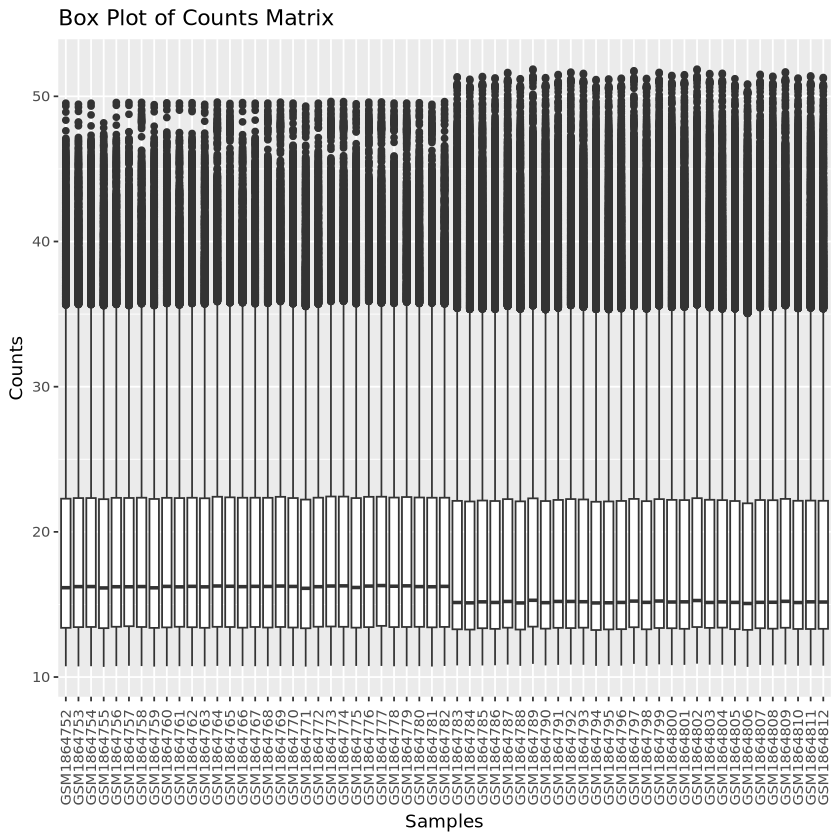

In [128]:
box_plot

In [138]:
dir.create("CSU_skin_MicroArray_GSE72542", showWarnings = FALSE)
saveRDS(counts, file = file.path("CSU_skin_MicroArray_GSE72542", "expression.rds"))
saveRDS(pdata, file = file.path("CSU_skin_MicroArray_GSE72542", "metadata.rds"))

In [141]:
system("R -e \"shiny::runApp('CSU_skin_MicroArray_GSE72542')\"")